您的模型应包括尚未获得奖牌的国家/地区;您对有多少人将在下一届奥运会上获得他们的第一枚奖牌的预测是多少？你对这个估计的**赔率**是多少？

即给出可能获得新奖牌的国家/地区，以及他们获得第一枚奖牌的概率，概率转化为**赔率**


In [85]:
import numpy as np
import json
import pandas as pd

PredData2028  = np.load("processed_data/PredData2028.npy")
TotalData  = np.load("processed_data/TotalData.npy")

baseData  = json.load(open("processed_data/baseData.json","r"))

N0 = json.load(open("processed_data/N0.json","r"))
print(N0)
baseData = pd.DataFrame(baseData)

country = baseData["NOC"].unique()


YearA3  = json.load(open("processed_data/YearA3.json","r"))



{'Athletics': {'0': 0.910190748880913, '2': 0.030931161027543654, '3': 0.02911642537403718, '1': 0.02976166471750615}, 'Gymnastics': {'3': 0.06009560664693831, '2': 0.05622581379467334, '0': 0.8365581607102208, '1': 0.04712041884816754}, 'Swimming': {'0': 0.8729076876816678, '1': 0.03778690989275333, '2': 0.04189636163175303, '3': 0.047409040793825796}, 'Shooting': {'0': 0.9028582103493368, '3': 0.0319447039043527, '1': 0.03456005977956286, '2': 0.030637025966747618}, 'Cycling': {'3': 0.03823484962974157, '0': 0.8855977028865044, '2': 0.03853710140547076, '1': 0.03763034607828321}, 'Rowing': {'2': 0.08239655584788329, '1': 0.08622339153312604, '0': 0.7531690983018416, '3': 0.078210954317149}, 'Fencing': {'0': 0.8236216943074854, '2': 0.05804571940833707, '1': 0.05692514567458539, '3': 0.061407440609592114}, 'Football': {'0': 0.7824203465623253, '3': 0.0718278367803242, '1': 0.07490217998882057, '2': 0.0708496366685299}, 'Wrestling': {'0': 0.8290298782736998, '2': 0.05440796753965326, '

In [86]:
Year = baseData["Year"].unique()
print(Year)
countryHasMadel = {country[i]:0 for i in range(len(country))}
nowCountry = set()
for row in baseData.itertuples():
    if row.Medal != "No medal":
        countryHasMadel[row.NOC] = 1
    if row.Year == 2024:
        # print("enter")
        nowCountry.add(row.NOC)

countryNoMadel = [country[i] for i in range(len(country)) if countryHasMadel[country[i]] == 0]
# print(nowCountry)
countryNoMadel = set(countryNoMadel) & nowCountry

print(countryNoMadel)

[1992 2012 1920 1900 1932 1952 2000 1996 1912 1924 1948 2008 2016 2004
 1984 1968 1972 1988 1936 1956 1960 1928 1976 1980 1964 1906 1904 1908
 1896 2020 2024]
{'CAM', 'BEN', 'OMA', 'YEM', 'SSD', 'COM', 'BOL', 'LBA', 'NCA', 'RWA', 'PLW', 'STP', 'SKN', 'MHL', 'GAM', 'VIN', 'NEP', 'MLT', 'CAY', 'CHA', 'IVB', 'LBR', 'TUV', 'MTN', 'MAW', 'MYA', 'MDV', 'BIH', 'GEQ', 'KIR', 'HON', 'ESA', 'LIE', 'LBN', 'LAO', 'CAF', 'AND', 'SOM', 'SEY', 'NRU', 'SWZ', 'PNG', 'SAM', 'VAN', 'ANG', 'FSM', 'BRU', 'GBS', 'BAN', 'MLI', 'GUI', 'COD', 'ASA', 'TLS', 'CGO', 'GUM', 'PLE', 'MAD', 'ANT', 'SOL', 'SLE', 'LES', 'ARU', 'COK', 'BHU', 'BIZ'}


In [87]:
Year  = baseData["Year"].unique()
Year  = sorted(Year)
print(Year)


[np.int64(1896), np.int64(1900), np.int64(1904), np.int64(1906), np.int64(1908), np.int64(1912), np.int64(1920), np.int64(1924), np.int64(1928), np.int64(1932), np.int64(1936), np.int64(1948), np.int64(1952), np.int64(1956), np.int64(1960), np.int64(1964), np.int64(1968), np.int64(1972), np.int64(1976), np.int64(1980), np.int64(1984), np.int64(1988), np.int64(1992), np.int64(1996), np.int64(2000), np.int64(2004), np.int64(2008), np.int64(2012), np.int64(2016), np.int64(2020), np.int64(2024)]


In [88]:
# YearAtotalcount = {}
# for row in baseData.itertuples():
#     if row.Year not in YearAtotalcount:
#         YearAtotalcount[row.Year] = 1
#     else:
#         YearAtotalcount[row.Year] += 1
# print(YearAtotalcount)
# athlete = {}
# YearAinitialcount = {}
# for row in baseData.itertuples():
#     if row.Name not in athlete:
#         if row.Year not in YearAinitialcount:
#             YearAinitialcount[row.Year] = 1
#         else:
#             YearAinitialcount[row.Year] += 1
#         athlete[row.Name] = row.Year
#     else:
#         athlete[row.Name] = max(row.Year,athlete[row.Name])

# YearAfinalcount = {}
# for key,value in athlete.items():
#     if value not in YearAfinalcount:
#         YearAfinalcount[value] = 1
#     else:
#         YearAfinalcount[value] += 1


In [89]:
peopleAcountry = {}

for row in baseData.itertuples():
    if  row.Name not in peopleAcountry:
        peopleAcountry[row.Name] = [row.NOC,row.Year]
    else:
        if row.Year > peopleAcountry[row.Name][1]:
            peopleAcountry[row.Name] = [row.NOC,row.Year]


In [90]:
ratio = 14314.9042487/ 14892

# print(YearA3.keys())
Initial = YearA3["Initial"]
print(Initial)
Initial2028 = Initial["2024"]*ratio



{'1992': 6594, '2012': 6468, '1920': 2274, '1900': 1183, '1932': 1466, '1952': 3755, '2000': 6879, '1996': 7019, '1912': 1952, '1948': 3901, '2008': 6781, '2016': 7075, '1984': 5534, '1968': 4010, '1988': 6303, '1936': 3784, '2004': 6585, '1976': 4226, '1956': 2395, '1924': 2585, '1960': 4098, '1972': 5221, '1964': 3660, '1980': 3924, '1906': 752, '1928': 2561, '1908': 1731, '1904': 604, '1896': 170, '2020': 9557, '2024': 6945}


In [91]:
people2024Count = {}
sports2024Count = {}
for row in baseData.itertuples():
    if row.Year == 2024:
        if row.NOC not in people2024Count:
            people2024Count[row.NOC]=0
        people2024Count[row.NOC]+=1
        if row.NOC not in sports2024Count:
            sports2024Count[row.NOC]=0
        sports2024Count[row.NOC]+=1

total_count = sum(people2024Count.values())
people2024CountNormalized = {k: v / total_count for k, v in people2024Count.items()}
print(people2024CountNormalized)

total_count = sum(sports2024Count.values())
sports2024CountNormalized = {k: v / total_count for k, v in sports2024Count.items()}
print(sports2024CountNormalized)

{'ARM': 0.001141552511415525, 'COL': 0.007050765511684126, 'JAM': 0.005439161966156326, 'GAM': 0.0005372011818426001, 'MEX': 0.010408272898200377, 'COM': 0.00033575073865162506, 'IRQ': 0.0015444533977974752, 'DJI': 0.00047005103411227505, 'UAE': 0.0010744023636852001, 'IRI': 0.0030889067955949504, 'MAW': 0.000201450443190975, 'ARG': 0.010341122750470052, 'SGP': 0.0021488047273704003, 'MAS': 0.0021488047273704003, 'MTN': 0.00013430029546065002, 'GAB': 0.00033575073865162506, 'IND': 0.009266720386784852, 'ETH': 0.0023502551705613752, 'SKN': 0.000201450443190975, 'CGO': 0.00026860059092130003, 'PUR': 0.0035589578297072254, 'ISV': 0.00033575073865162506, 'LCA': 0.00033575073865162506, 'MHL': 0.00026860059092130003, 'JOR': 0.0008729519204942251, 'OMA': 0.00026860059092130003, 'GHA': 0.000738651625033575, 'LBA': 0.00040290088638195, 'ALG': 0.0036932581251678752, 'CAY': 0.00033575073865162506, 'GUY': 0.00033575073865162506, 'AIN': 0.0030889067955949504, 'VIN': 0.00026860059092130003, 'ROU': 0

In [92]:
print(PredData2028[0,9:])
print(PredData2028[:,10])

['Aliyah Abrams' '2028' 'Athletics' '0.654177188873291'
 '0.6245231032371521' '0.46064677834510803' '0.3980009853839874'
 '0.3589889407157898']
['2028' '2028' '2028' ... '2028' '2028' '2028']


In [93]:
a = {}

n,m = PredData2028.shape
for i in range(n):
    # print(PredData2028[i,9])
    # print(type(PredData2028[i,9]))
    if peopleAcountry[str(PredData2028[i,9])][0] in countryNoMadel :
        if (peopleAcountry[PredData2028[i,9]][0],PredData2028[i,11]) not in a:
            a[(peopleAcountry[str(PredData2028[i,9])][0],str(PredData2028[i,11]))] = [PredData2028[i,-4]]
        else :
            a[(peopleAcountry[str(PredData2028[i,9])][0],str(PredData2028[i,11]))].append(PredData2028[i,-4])
        # a.append((peopleAcountry[PredData2028[i,9]],PredData2028[i,11],PredData2028[i,-4]))
print(a.keys())

dict_keys([('SOL', 'Athletics'), ('OMA', 'Athletics'), ('ANT', 'Athletics'), ('VIN', 'Athletics'), ('SSD', 'Athletics'), ('LBR', 'Athletics'), ('CGO', 'Athletics'), ('LAO', 'Athletics'), ('MAW', 'Athletics'), ('GUM', 'Athletics'), ('BEN', 'Athletics'), ('COK', 'Athletics'), ('SWZ', 'Athletics'), ('BIH', 'Athletics'), ('SAM', 'Athletics'), ('GBS', 'Athletics'), ('FSM', 'Athletics'), ('BIZ', 'Athletics'), ('SOM', 'Athletics'), ('TUV', 'Athletics'), ('IVB', 'Athletics'), ('MLI', 'Athletics'), ('ARU', 'Swimming'), ('OMA', 'Swimming'), ('PLE', 'Swimming'), ('SEY', 'Swimming'), ('MAW', 'Swimming'), ('HON', 'Swimming'), ('FSM', 'Swimming'), ('ASA', 'Swimming'), ('NEP', 'Swimming'), ('BHU', 'Swimming'), ('SLE', 'Swimming'), ('MLT', 'Swimming'), ('ESA', 'Swimming'), ('BIH', 'Swimming'), ('NCA', 'Swimming'), ('TLS', 'Swimming'), ('LBN', 'Shooting'), ('NCA', 'Rowing'), ('GBS', 'Wrestling'), ('GUM', 'Wrestling'), ('ANG', 'Sailing'), ('ESA', 'Sailing'), ('SAM', 'Canoeing'), ('AND', 'Canoeing'), ('P

In [94]:
zero = []
for key,value in N0.items():
    if "0" in value:
        zero.append(value["0"])
    print(key,value)
    
finalzero  = sum(zero)/len(zero)

Athletics {'0': 0.910190748880913, '2': 0.030931161027543654, '3': 0.02911642537403718, '1': 0.02976166471750615}
Gymnastics {'3': 0.06009560664693831, '2': 0.05622581379467334, '0': 0.8365581607102208, '1': 0.04712041884816754}
Swimming {'0': 0.8729076876816678, '1': 0.03778690989275333, '2': 0.04189636163175303, '3': 0.047409040793825796}
Shooting {'0': 0.9028582103493368, '3': 0.0319447039043527, '1': 0.03456005977956286, '2': 0.030637025966747618}
Cycling {'3': 0.03823484962974157, '0': 0.8855977028865044, '2': 0.03853710140547076, '1': 0.03763034607828321}
Rowing {'2': 0.08239655584788329, '1': 0.08622339153312604, '0': 0.7531690983018416, '3': 0.078210954317149}
Fencing {'0': 0.8236216943074854, '2': 0.05804571940833707, '1': 0.05692514567458539, '3': 0.061407440609592114}
Football {'0': 0.7824203465623253, '3': 0.0718278367803242, '1': 0.07490217998882057, '2': 0.0708496366685299}
Wrestling {'0': 0.8290298782736998, '2': 0.05440796753965326, '3': 0.05219476208041313, '1': 0.0643

In [95]:
np.random.seed(42)  # 你可以根据需要调整种子值

initialPeople2024Count =  {k: v * Initial2028 for k, v in people2024CountNormalized.items()}
# print(initialPeople2024Count)
Pcountry = {}

for coun in countryNoMadel:
    Pcountry[coun] = []
    newpeople = initialPeople2024Count[coun]
    sports2024Count_country = {}
    for row in baseData.itertuples():
        if row.Year == 2024 and row.NOC == coun:
            for sport in row.Sport:
                if sport not in sports2024Count_country:
                    sports2024Count_country[sport]=0
                sports2024Count_country[sport]+=1
    
    for key,value in sports2024Count_country.items():
        # tempP = N0[key]["0"]**value
        Pcountry[coun].extend([N0[key]["0"]]*value)
        print(coun,key)
        # break
        if (coun,key) in a:
            print("add")
            # Pcountry[coun].extend(a[(coun,key)])
            for item in a[(coun, key)]:
                noise = np.random.normal(0, 1)  # 再次生成高斯噪声
                modified_prob = 1 - (1-float(item)) * (1 + noise)  # 将噪声加到概率上
                Pcountry[coun].append(modified_prob)
                print(coun, key, modified_prob)  # 打印添加的噪声后的概率
    
print(Pcountry)


CAM Athletics
CAM Swimming
BEN Athletics
add
BEN Athletics 0.47898960056545803
BEN Athletics 0.7955683317834992
BEN Swimming
BEN Judo
OMA Shooting
OMA Swimming
add
OMA Swimming 0.6433675783054442
OMA Athletics
add
OMA Athletics 0.12172622231991737
YEM Swimming
YEM Shooting
YEM Judo
YEM Athletics
SSD Basketball
SSD Athletics
add
SSD Athletics 0.7334066392448979
SSD Athletics 0.8342334819877929
COM Athletics
COM Swimming
COM Canoeing
BOL Athletics
BOL Swimming
LBA Weightlifting
LBA Rowing
LBA Shooting
LBA Athletics
LBA Swimming
NCA Athletics
NCA Judo
add
NCA Judo 0.1021687764957544
NCA Swimming
add
NCA Swimming 0.38475100782752625
NCA Rowing
add
NCA Rowing 0.8153225440287449
NCA Surfing
NCA Shooting
RWA Athletics
RWA Swimming
RWA Fencing
RWA Cycling
PLW Athletics
PLW Swimming
STP Canoeing
STP Judo
STP Athletics
SKN Athletics
SKN Swimming
MHL Weightlifting
add
MHL Weightlifting 0.4630305173211947
MHL Swimming
MHL Athletics
GAM Athletics
GAM Swimming
GAM Judo
add
GAM Judo 0.872705266425781

In [96]:
# PredCount = {}
# n,m = PredData2028.shape
# for i in range(n):
#     # 9为Name,10为Year,11为Sport
#     PredCount[(peopleAcountry[PredData2028[i,9]],PredData2028[i,10],PredData2028[i,11])] 


    



In [97]:
import math
P = {}
for key,value in Pcountry.items():
    a = []
    P[key] = 0
    for v in value:
        P[key] += math.log10(max(float(v),0.1))
    P[key] = 1 - 10 ** P[key]

print(P)


{'CAM': 0.30646392908438624, 'BEN': 0.7903220912030605, 'OMA': 0.9488676185851532, 'YEM': 0.3747295262476392, 'SSD': 0.9757729446996661, 'COM': 0.5051992215012919, 'BOL': 0.3687498842373915, 'LBA': 0.5969458530898916, 'NCA': 0.9882887400833873, 'RWA': 0.6388906842134033, 'PLW': 0.30646392908438624, 'STP': 0.32986745297060593, 'SKN': 0.2768420708504369, 'MHL': 0.7255514349908943, 'GAM': 0.6907810824304552, 'VIN': 0.48615039498106616, 'NEP': 0.6781417944723751, 'MLT': 0.2806772796257556, 'CAY': 0.49968437420337564, 'CHA': 0.15786342697848077, 'IVB': 0.43587266122432466, 'LBR': 0.7356053831373703, 'TUV': 0.09762159822018113, 'MTN': 0.20548749804511668, 'MAW': 0.9181938986532195, 'MYA': 0.5144444566925079, 'MDV': 0.35796637806708176, 'BIH': 0.73517158657765, 'GEQ': 0.2768420708504369, 'KIR': 0.32194902265271486, 'HON': 0.6523698549416155, 'ESA': 0.7945573069477443, 'LIE': 0.11440229711349559, 'LBN': 0.985479843274648, 'LAO': 0.41709246015329693, 'CAF': 0.39547162869836416, 'AND': 0.7994875

In [98]:
total = sum(P.values())
P2 = {k:v/total for k,v in P.items()}
print(P2)

# json.dump(P2,open("processed_data/P2.json","w"))
# 按值从大到小排序并选择前5个
top_5 = sorted(P2.items(), key=lambda x: x[1], reverse=True)[:5]
top_10 = sorted(P2.items(), key=lambda x: x[1], reverse=True)[:10]

# 输出前5个
print(top5)

{'CAM': 0.00831808405888206, 'BEN': 0.02145102559984585, 'OMA': 0.02575428904707816, 'YEM': 0.010170957828497414, 'SSD': 0.026484556928589684, 'COM': 0.013712183366847078, 'BOL': 0.010008657602719238, 'LBA': 0.016202382444935375, 'NCA': 0.026824262284376905, 'RWA': 0.017340854539068556, 'PLW': 0.00831808405888206, 'STP': 0.008953305566161064, 'SKN': 0.00751408370717205, 'MHL': 0.019693011974779392, 'GAM': 0.018749270516465525, 'VIN': 0.013195157625215117, 'NEP': 0.01840621330906812, 'MLT': 0.007618179445524602, 'CAY': 0.013562498659961607, 'CHA': 0.00428474978883606, 'IVB': 0.011830512797590034, 'LBR': 0.019965897550761818, 'TUV': 0.002649658191043695, 'MTN': 0.005577368556538967, 'MAW': 0.02492173892754297, 'MYA': 0.013963118749991284, 'MDV': 0.009715970267403468, 'BIH': 0.019954123387782872, 'GEQ': 0.00751408370717205, 'KIR': 0.008738382494478844, 'HON': 0.017706707954497483, 'ESA': 0.02156597837969512, 'LIE': 0.003105122115879508, 'LBN': 0.02674802283969699, 'LAO': 0.011320778123045

['CAM', 'BEN', 'OMA', 'YEM', 'SSD', 'COM', 'BOL', 'LBA', 'NCA', 'RWA', 'PLW', 'STP', 'SKN', 'MHL', 'GAM', 'VIN', 'NEP', 'MLT', 'CAY', 'CHA', 'IVB', 'LBR', 'TUV', 'MTN', 'MAW', 'MYA', 'MDV', 'BIH', 'GEQ', 'KIR', 'HON', 'ESA', 'LIE', 'LBN', 'LAO', 'CAF', 'AND', 'SOM', 'SEY', 'NRU', 'SWZ', 'PNG', 'SAM', 'VAN', 'ANG', 'FSM', 'BRU', 'GBS', 'BAN', 'MLI', 'GUI', 'COD', 'ASA', 'TLS', 'CGO', 'GUM', 'PLE', 'MAD', 'ANT', 'SOL', 'SLE', 'LES', 'ARU', 'COK', 'BHU', 'BIZ']

['#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#f7cdcc', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#f7cdcc', '#d5e7d5', '#f7cdcc', '#d5e7d5', '#d5e7d5', '#d5e7d5', '#d5e7d

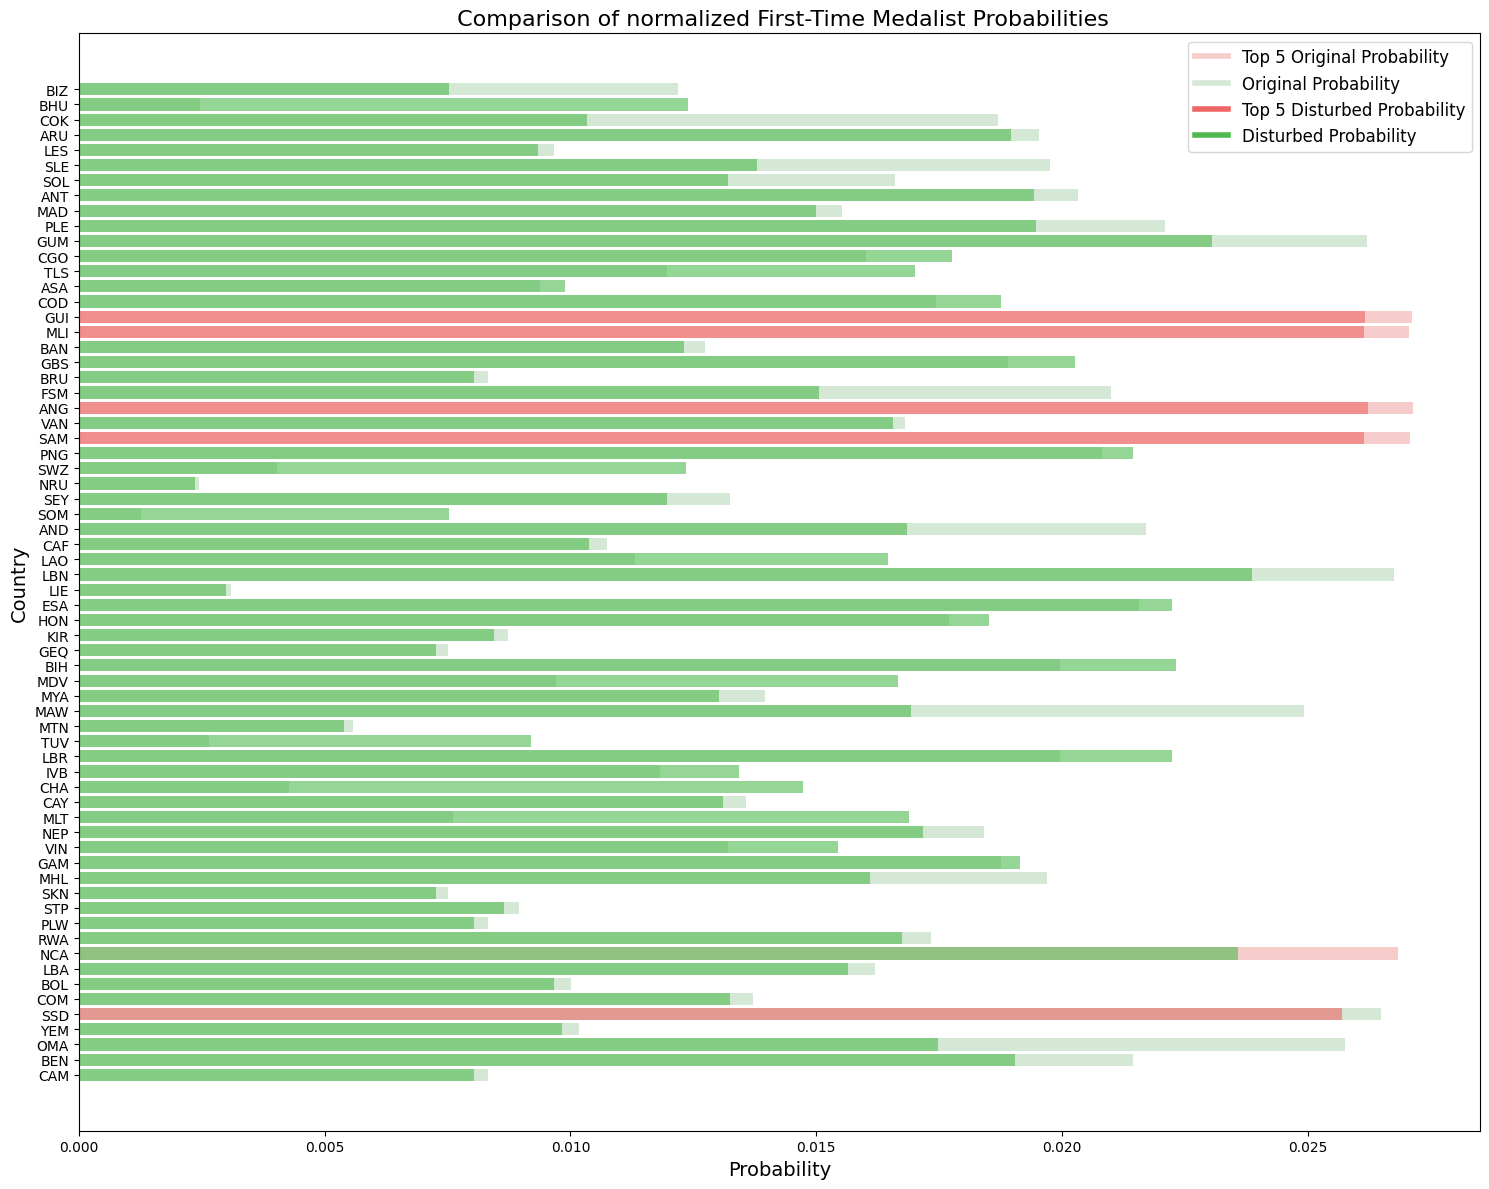

In [116]:
import matplotlib.pyplot as plt
# 获取国家/地区名和其对应的概率值
countries = list(P2.keys())
print(countries )
print()
probabilities = list(P2.values())

P3  = json.load(open("processed_data/P2.json","r"))

probabilities2 = [P3[coun] for coun in countries]
top_52 = sorted(P3.items(), key=lambda x: x[1], reverse=True)[:5]

colors = []
colors2 = []
for country in countries:
    if (country,P2[country]) in top_5:
        colors.append('#f7cdcc')
    else :
        colors.append('#d5e7d5')

    if (country,P3[country]) in top_52:
        colors2.append('#ee6666')
    else :
        colors2.append('#4fb94f')
        
print(colors)
# 绘制柱状图
plt.figure(figsize=(15, 12))  # 图表大小
plt.barh(countries, probabilities, color=colors)  # 横向柱状图
plt.barh(countries, probabilities2, color=colors2, alpha=0.6)

# 设置图表的标题和轴标签
plt.title(' Comparison of normalized First-Time Medalist Probabilities', fontsize=16)

plt.xlabel('Probability', fontsize=14)
plt.ylabel('Country', fontsize=14)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='#f7cdcc', lw=4, label='Top 5 Original Probability'),
    Line2D([0], [0], color='#d5e7d5', lw=4, label='Original Probability'),
    Line2D([0], [0], color='#ee6666', lw=4, label='Top 5 Disturbed Probability'),
    Line2D([0], [0], color='#4fb94f', lw=4, label='Disturbed Probability')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
# 显示图表
plt.tight_layout()  # 防止标签被裁剪
plt.show()

In [100]:


a = [('ANG', 0.02622167349359978), ('GUI', 0.026149873673538108), ('SAM', 0.02613853989380021), ('MLI', 0.026133032138168123), ('SSD', 0.025691634099822693)]
b = [('ANG', 0.02622167349359978), ('GUI', 0.026149873673538108), ('SAM', 0.02613853989380021), ('MLI', 0.026133032138168123), ('SSD', 0.025691634099822693), ('LBN', 0.023861167402695366), ('NCA', 0.023567529040426242), ('GUM', 0.023041885071157935), ('BIH', 0.02231225889604599), ('LBR', 0.022235145014029623)]

for a1 in a:
    print("{}, {}, {}".format(a1[0],a1[1]*5.8,(1-a1[1]*5.8)/(a1[1]*5.8)))

ANG, 0.1520857062628787, 5.57523987344024
GUI, 0.15166926730652103, 5.593293537701458
SAM, 0.1516035313840412, 5.596152417233644
MLI, 0.1515715864013751, 5.597542611660147
SSD, 0.1490114777789716, 5.710892442012405
